In [27]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [29]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (7,7) # Make the figures a bit bigger

In [30]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

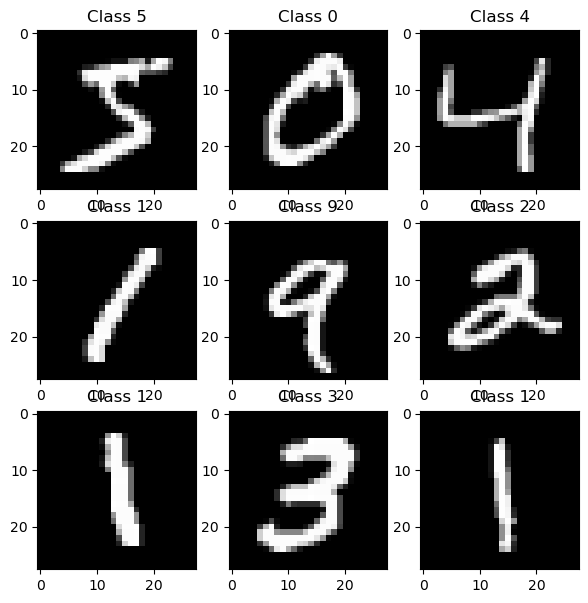

In [31]:
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[i]))

In [32]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [33]:
modelnn = keras.Sequential(
    [
        layers.Dense(512, input_shape=(784,), activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(512,activation="relu"),
        layers.Dropout(0.2),
        layers.Dense(10,activation="softmax")


    ]

)
modelnn.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [34]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

In [36]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 2s 3ms/step - loss: 0.0335 - accuracy: 0.9888 - val_loss: 0.0316 - val_accuracy: 0.9908
Epoch 2/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0320 - accuracy: 0.9896 - val_loss: 0.0291 - val_accuracy: 0.9925
Epoch 3/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.0327 - val_accuracy: 0.9917
Epoch 4/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0294 - accuracy: 0.9901 - val_loss: 0.0334 - val_accuracy: 0.9917
Epoch 5/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0289 - accuracy: 0.9908 - val_loss: 0.0275 - val_accuracy: 0.9928
Epoch 6/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0280 - accuracy: 0.9906 - val_loss: 0.0296 - val_accuracy: 0.9923
Epoch 7/15
422/422 [==============================] - 1s 3ms/step - loss: 0.0264 - accuracy: 0.9915 - val_loss: 0.0293 - val_accuracy: 0.9918
Epoch 

In [9]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.02357267588376999
Test accuracy: 0.9922000169754028


(1, 28, 28, 1)


Text(0.5, 1.0, 'Class 7')

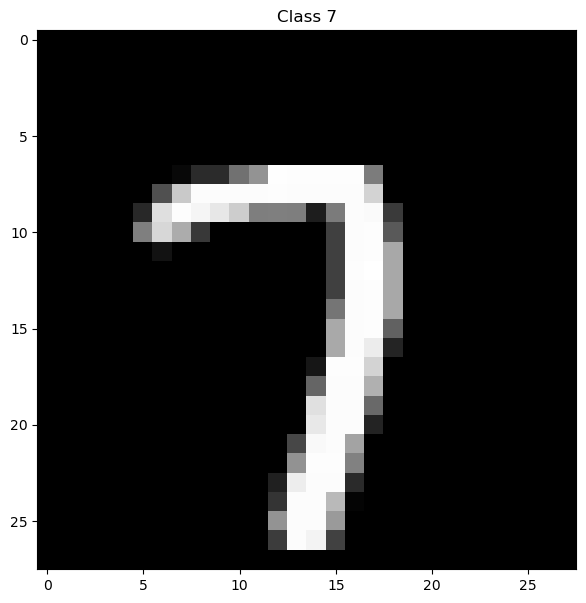

In [23]:
#pick random image from test set
i = np.random.randint(0,10000)
plt.imshow(x_test[i], cmap='gray', interpolation='none')

x = np.expand_dims(x_test[i], axis=0)
print(x.shape)
predicted = model.predict(x)
plt.title("Class {}".format(np.argmax(predicted)))